In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data
from utils.visualization import scatter_data, scatter3d_data, visualization_2d, visualization_3d
from utils.preprocessing import scale_data, standardize_data, normalize_data

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test

In [5]:
choose_folder = nbaiot_data_path
# print(choose_folder)

In [6]:
train_index = 5

In [7]:
# Load data on device 
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [8]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((62154, 115), (62154,)),
 ((330096, 115), (330096,)),
 ((436010, 115), (436010,)))

In [9]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [10]:
data_benign = data_benign.to_numpy()

In [11]:
target_benign = target_benign.to_numpy()

In [12]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

# Visualization 2D

### Before Standardization

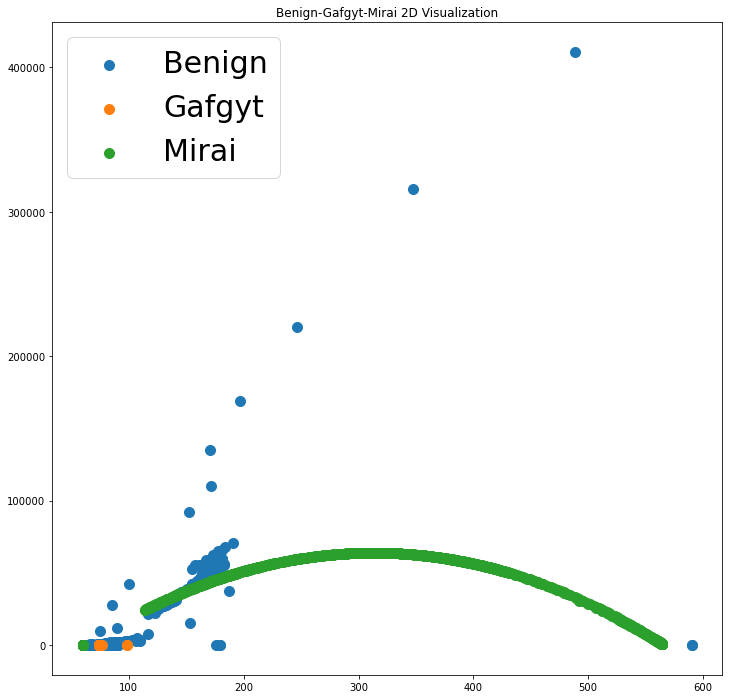

In [51]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2], s=100, fontsize=30)

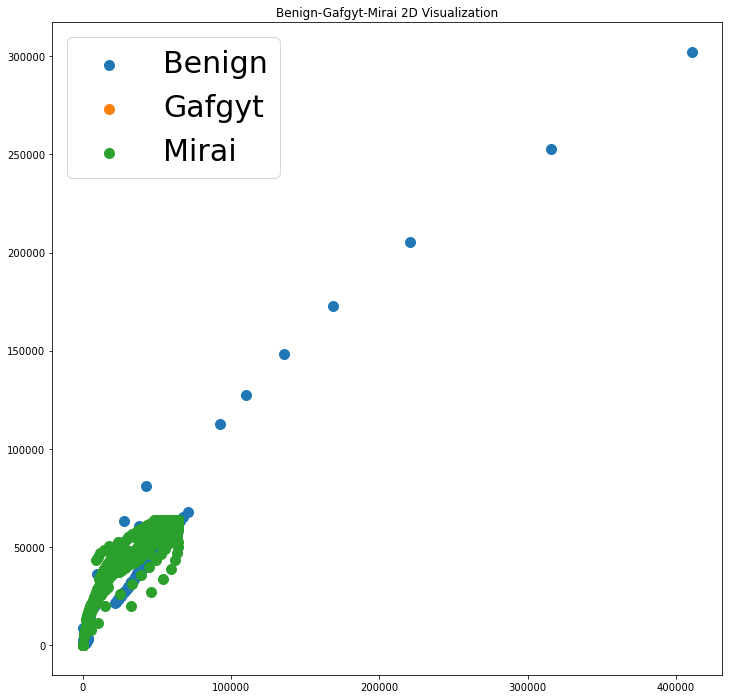

In [52]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[2,5], s=100, fontsize=30)

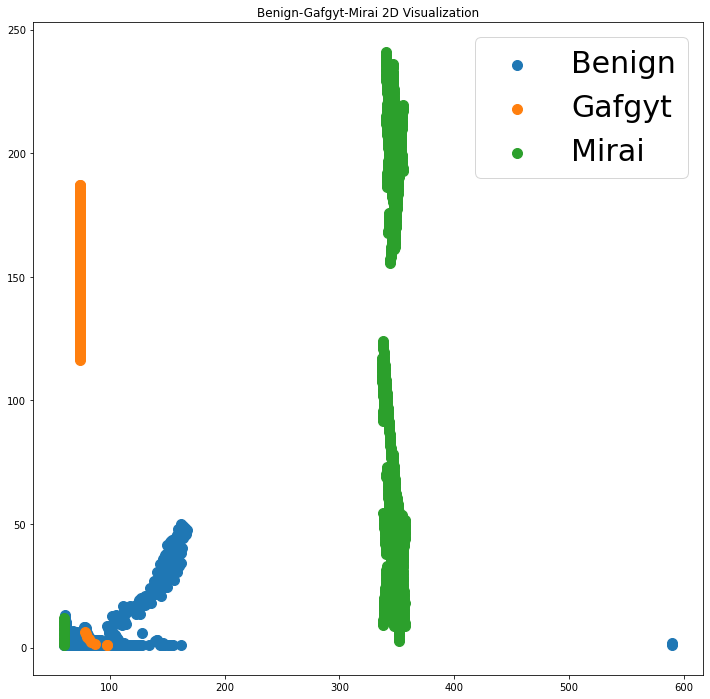

In [53]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[10,15], s=100, fontsize=30)

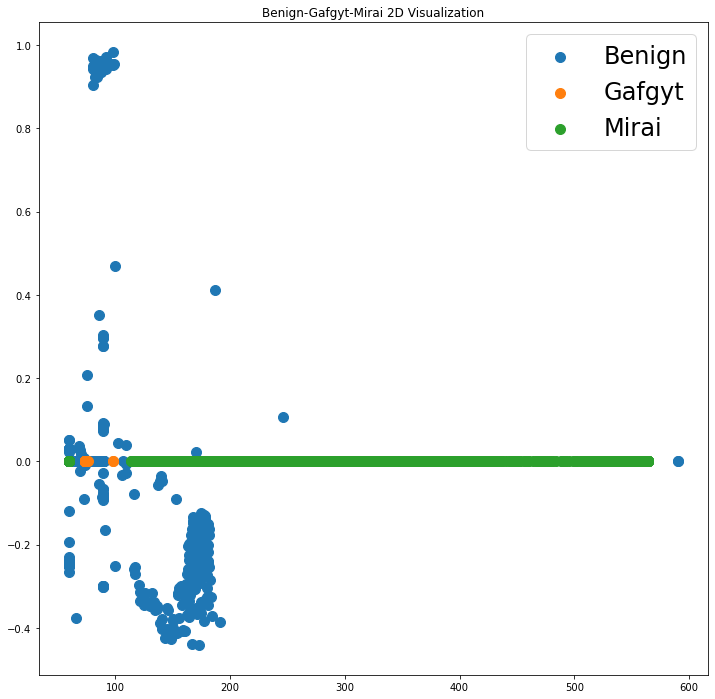

In [16]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,50], s=100, fontsize=24)

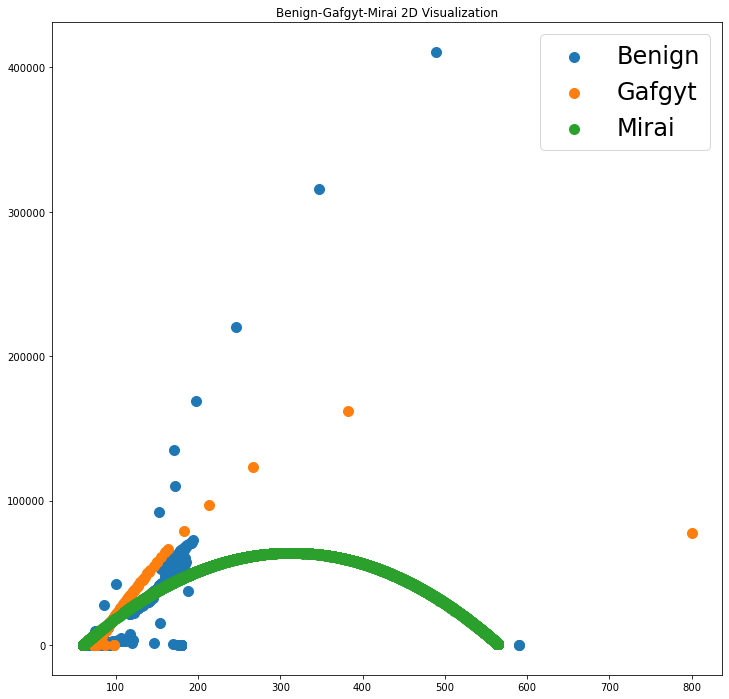

In [40]:
visualization_2d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,2], s=100, fontsize=24)

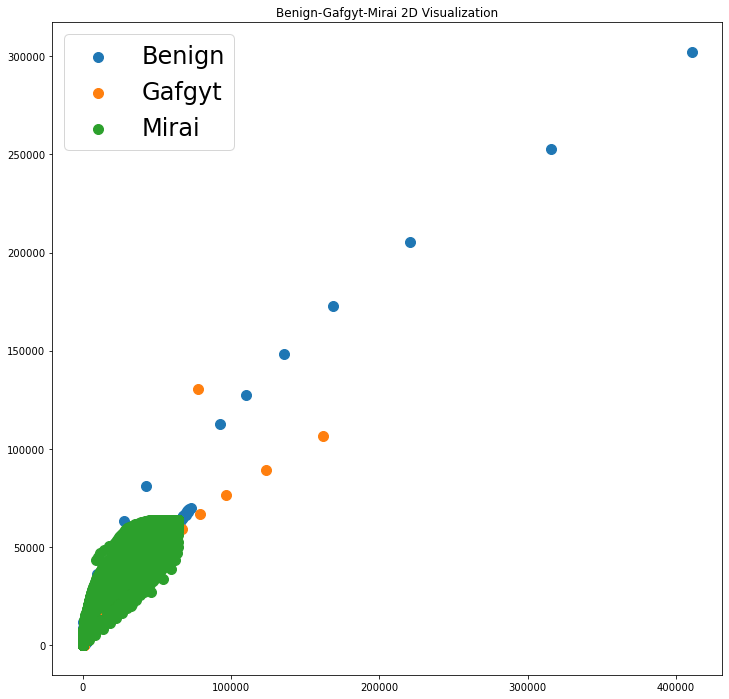

In [44]:
visualization_2d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[2,5], s=100, fontsize=24)

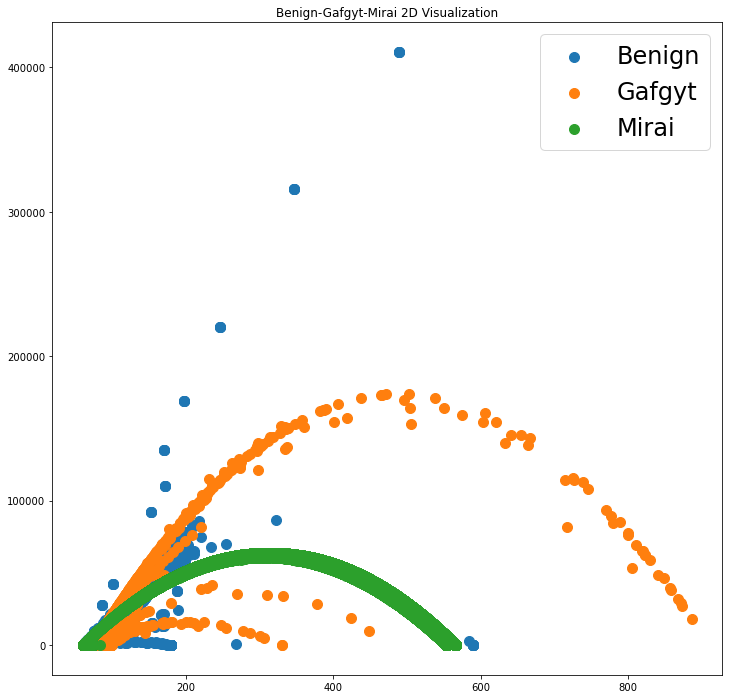

In [17]:
visualization_2d(data_benign, data_gafgyt, data_mirai, indexes=[1,2], s=100, fontsize=24)

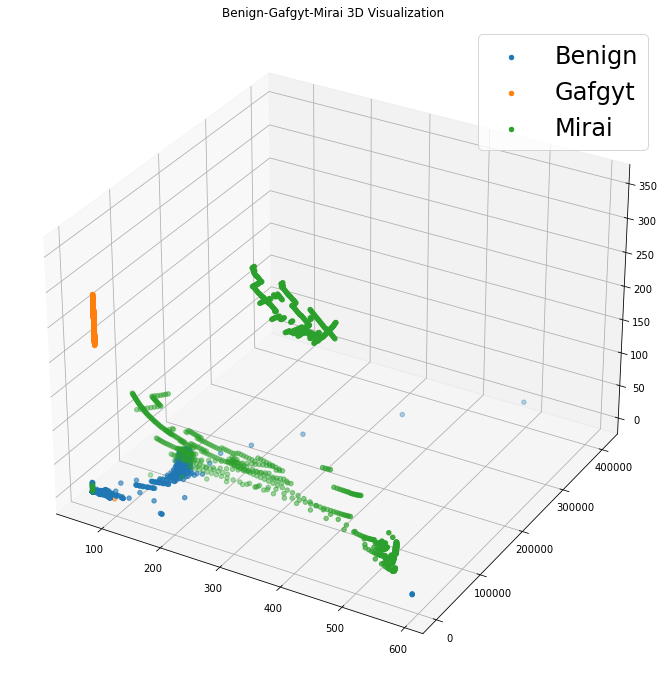

In [21]:
visualization_3d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2,3], fontsize=24)

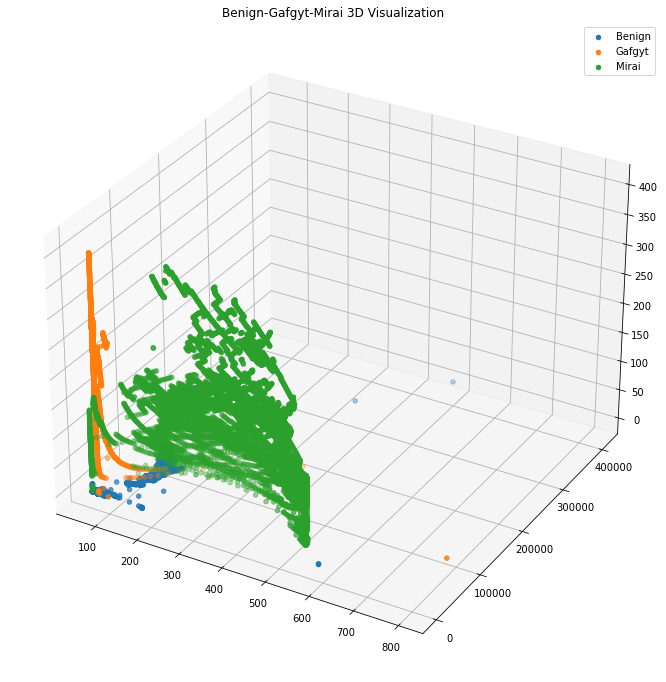

In [19]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,2,3])

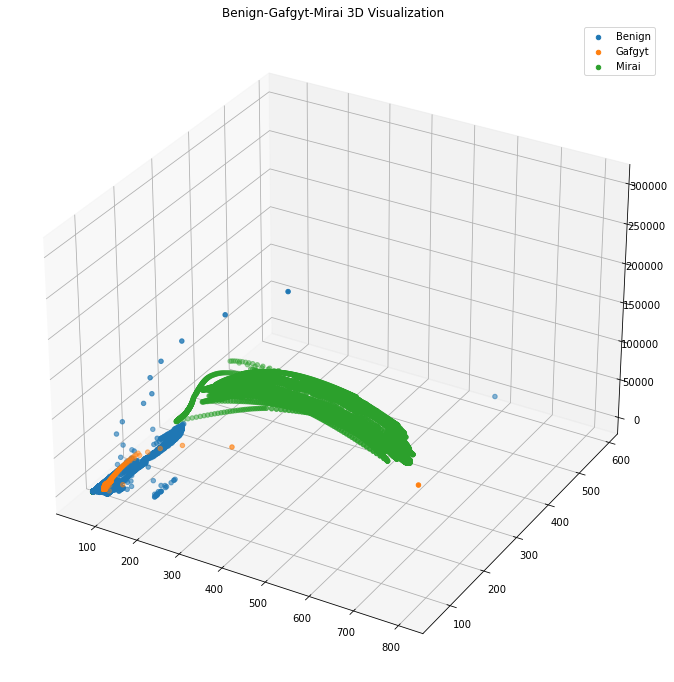

In [20]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,10,20])

## Standardization

In [21]:
# Normalize


In [22]:
scaller, data_benign_standardized, _ = scale_data(X_train=data_benign)

In [23]:
data_gafgyt_standardized = scaller.transform(data_gafgyt)

In [24]:
data_mirai_standardized = scaller.transform(data_mirai)

### Statistics

In [25]:
data_benign.min(), data_benign_standardized.min(), data_benign.max(), data_benign_standardized.max()

(-48509.02574, -1.0, 5.67e+17, 1.0)

In [26]:
data_benign.mean(), data_benign_standardized.mean()

(71647633471147.7, 0.09229116719165249)

In [27]:
data_gafgyt.min(), data_gafgyt_standardized.min(), data_gafgyt.max(), data_gafgyt_standardized.max()

(-84674.50914359995,
 -1.7867146557998146,
 5.669444901972914e+17,
 341.6806030796262)

In [28]:
data_gafgyt.mean(), data_gafgyt_standardized.mean()

(549873557224344.9, 2.217009613046797)

In [29]:
data_mirai.min(), data_mirai_standardized.min(), data_mirai.max(), data_mirai_standardized.max()

(0.0, 0.0, 5.68259134398996e+17, 506.755234348193)

In [30]:
data_mirai.mean(), data_mirai_standardized.mean()

(4574621027578.197, 4.054381792033148)

In [31]:
np.median(data_gafgyt_standardized), np.median(data_mirai_standardized)

(0.00801266804099308, 0.03803932925127484)

In [32]:
np.median(data_benign_standardized)

0.01858097931763098

In [33]:
data_gafgyt_standardized.std(), data_mirai_standardized.std()

(17.1050927478911, 21.703284000267917)

In [34]:
data_benign_standardized.std()

0.17999463361387857

In [35]:
np.median(data_benign), np.median(data_gafgyt), np.median(data_mirai)

(6.512456144, 1.0, 19.633773753329635)

In [36]:
data_benign.std(), data_gafgyt.std(), data_mirai.std()

(4999562435053007.0, 1.6219866333788176e+16, 1050453473412104.4)

### Visualization

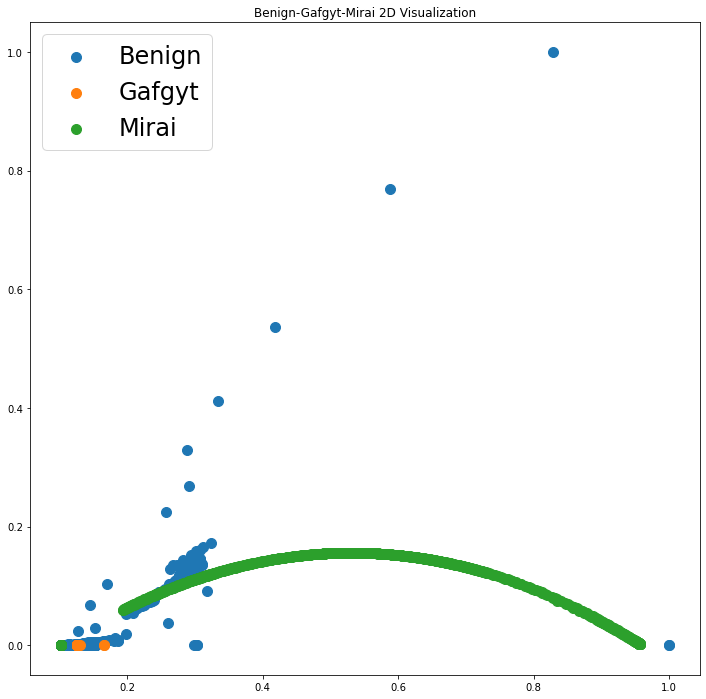

In [37]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[1,2], s=100, fontsize=24)

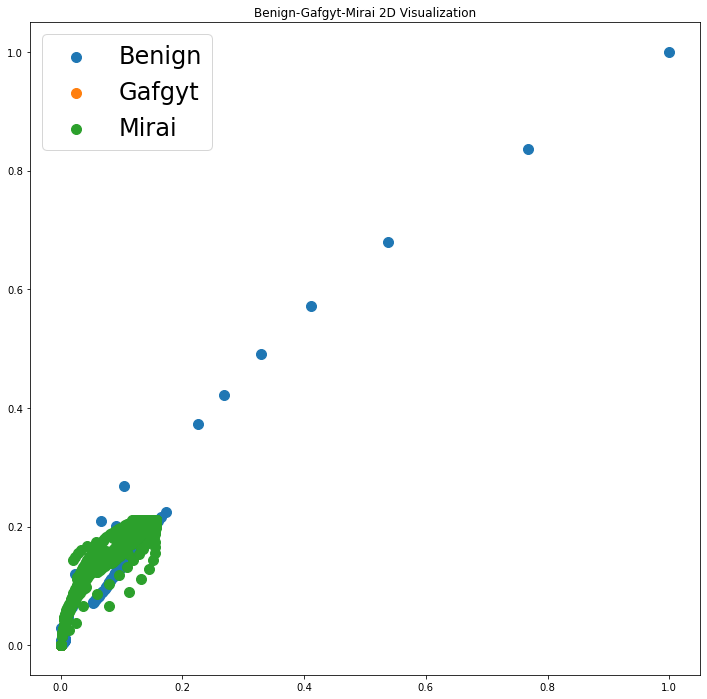

In [38]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[2,5], s=100, fontsize=24)

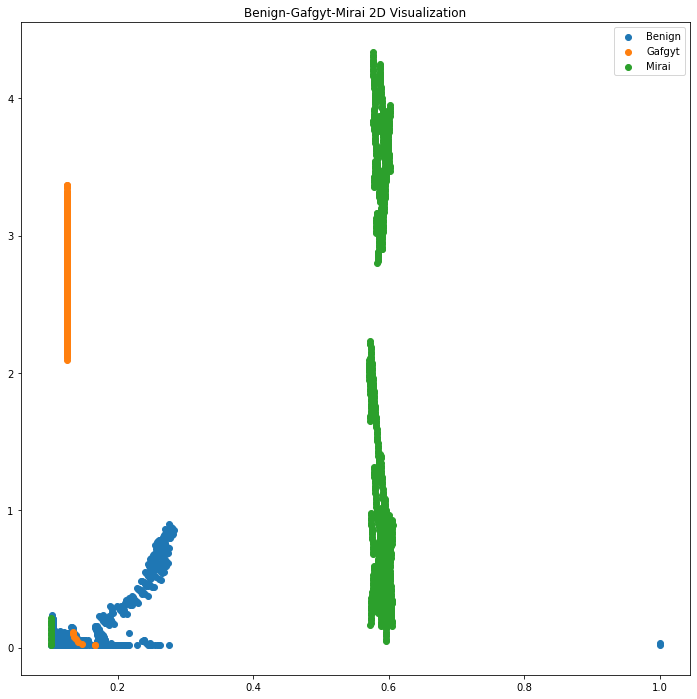

In [37]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[10,15])

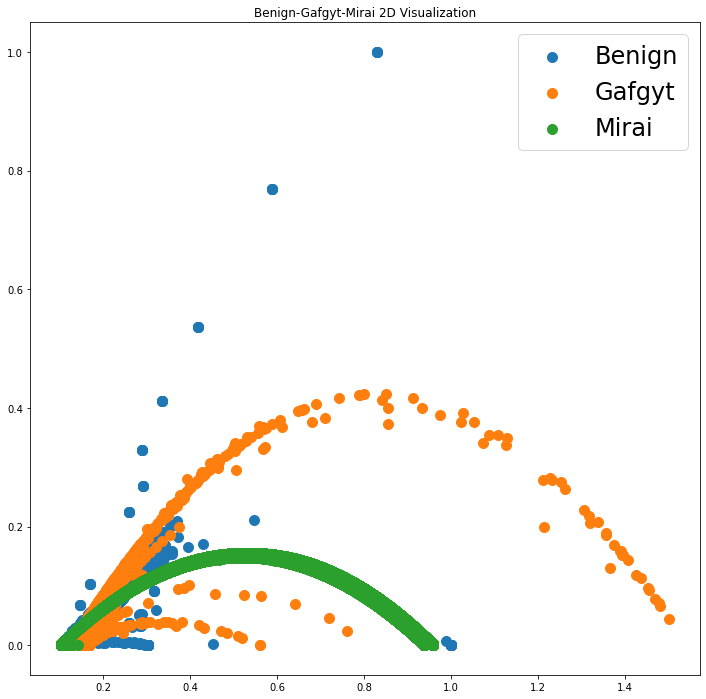

In [39]:
visualization_2d(data_benign_standardized, data_gafgyt_standardized, data_mirai_standardized, indexes=[1,2], s=100, fontsize=24)

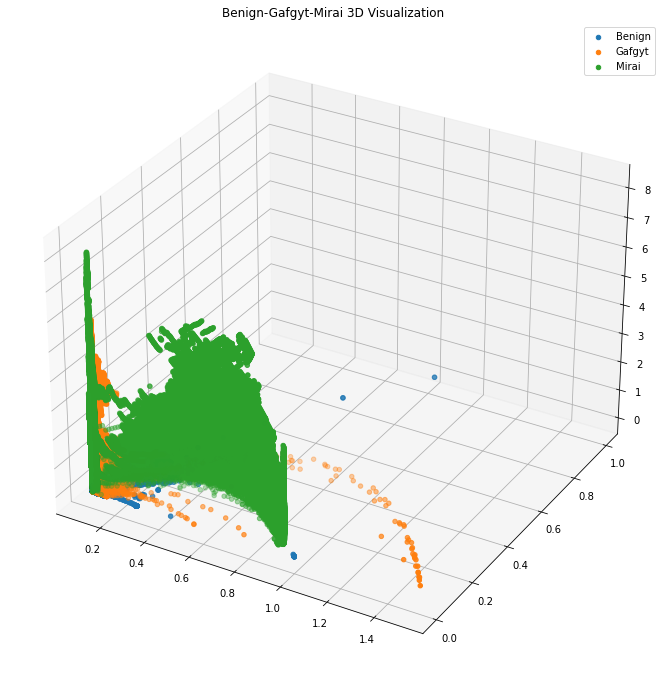

In [39]:
visualization_3d(data_benign_standardized, data_gafgyt_standardized, data_mirai_standardized, indexes=[1,2,3])

# Train AE

### Train on Benign

--------------Training and testing in the same device----------------
(62154, 115) (62154,)
------------Scale data-----------------
(62154, 115) (62154,)
X_train_scaled
[[1.80047973e-02 1.01694915e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.80047973e-02 1.00000000e+00 0.00000000e+00 ... 3.07640575e-02
  0.00000000e+00 0.00000000e+00]
 [3.49758538e-02 1.00000000e+00 0.00000000e+00 ... 3.50809097e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80202728e-02 1.01694915e-01 6.40562076e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.60247574e-02 1.01694915e-01 3.21498837e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.03306549e-02 1.01694915e-01 2.06051527e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `ae` is used for feacture extraction (it can be `ae` or `pca`)-----------
-------------AE process-------------
Epoch 1/50
249/249 [==============================] - 2s 10ms/step - loss: 0.0046 - val_loss: 0.0011
Epo

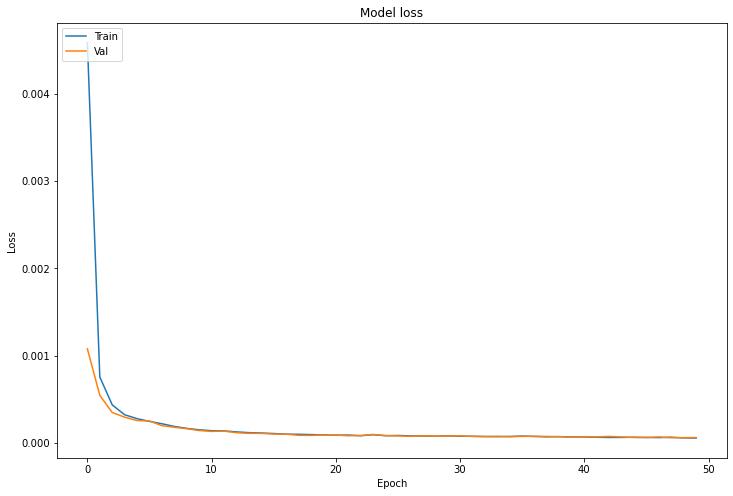

(62154, 29) (62154,)
---------Normalize data--------------
(62154, 29) (62154,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM-------------------------------------
Number of feature:  29
Hyper-parameters optimization process
Best: {'learning_rate': 4.011404238253963, 'sigma': 5.6757035178196755, 'x': 42.357027105967475}
---------SOM has been turned!-----------
Starting SOM Weights init
Perform SOM (turned) train random
1.0
Total train time: 188.32274794578552


In [40]:
_, _, _, _, encoder, _ = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='ae', num_features=29)

In [41]:
# Transform data
data_benign_encoded = encoder.predict(data_benign_standardized)
data_gafgyt_encoded = encoder.predict(data_gafgyt_standardized)
data_mirai_encoded = encoder.predict(data_mirai_standardized)

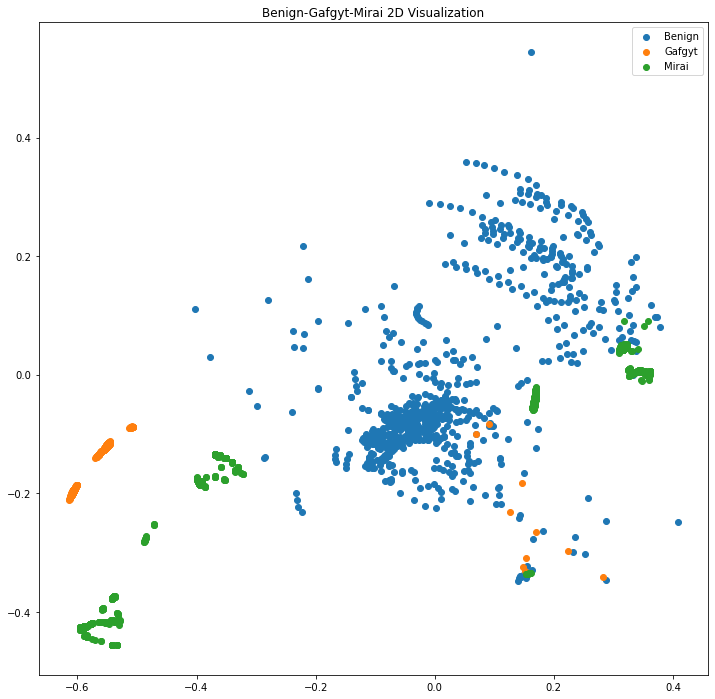

In [42]:
visualization_2d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[0,1])

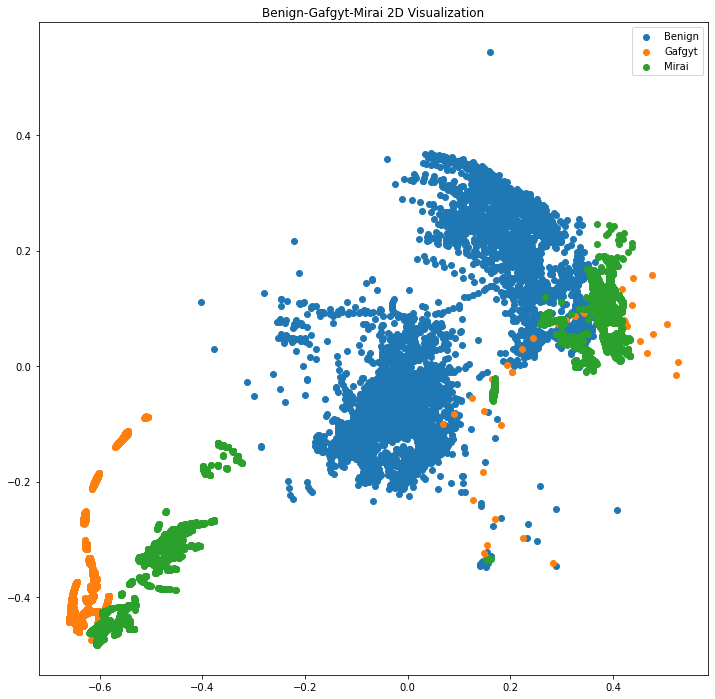

In [43]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[0,1])

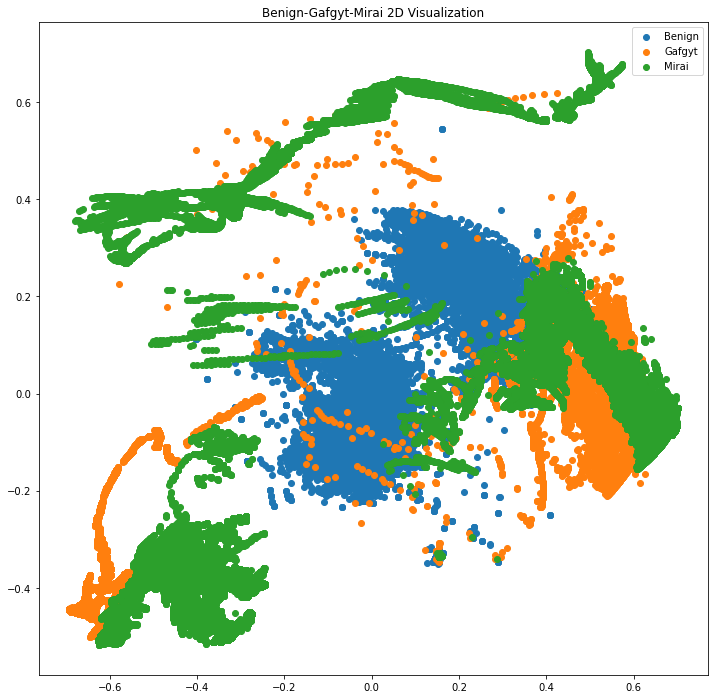

In [44]:
visualization_2d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[0,1])

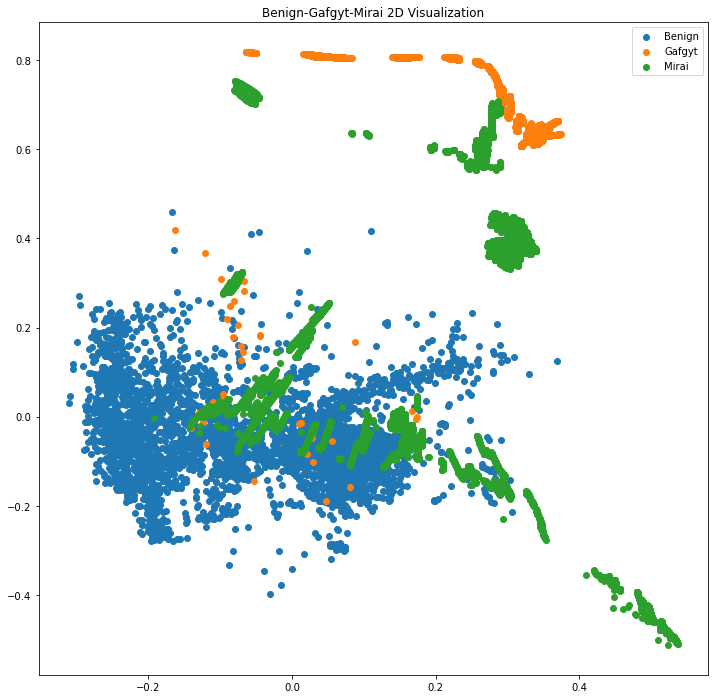

In [45]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[10,25])

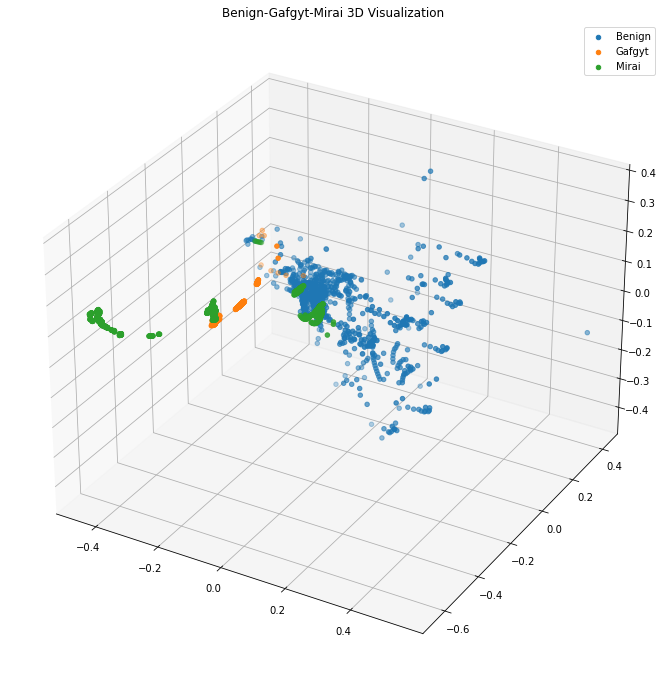

In [46]:
visualization_3d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[1,2,3])

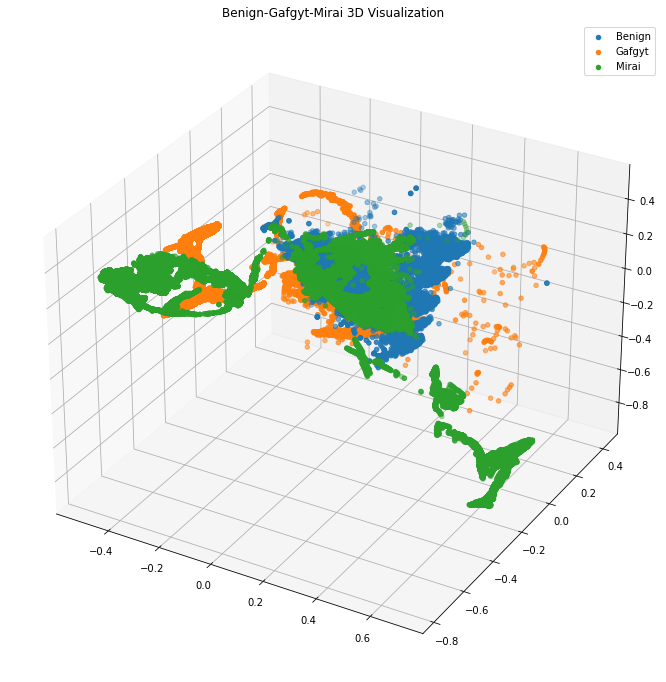

In [47]:
visualization_3d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[1,2,3])

In [48]:
_, _, _, _, _, pca = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='pca', num_features=29)

--------------Training and testing in the same device----------------
(62154, 115) (62154,)
------------Scale data-----------------
(62154, 115) (62154,)
X_train_scaled
[[1.80047973e-02 1.01694915e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.80047973e-02 1.00000000e+00 0.00000000e+00 ... 3.07640575e-02
  0.00000000e+00 0.00000000e+00]
 [3.49758538e-02 1.00000000e+00 0.00000000e+00 ... 3.50809097e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80202728e-02 1.01694915e-01 6.40562076e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.60247574e-02 1.01694915e-01 3.21498837e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.03306549e-02 1.01694915e-01 2.06051527e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `pca` is used for feacture extraction (it can be `ae` or `pca`)-----------
PCA process
(62154, 29) (62154,)
---------Normalize data--------------
(62154, 29) (62154,)
--------------------Train SOM on normalized data

In [49]:
data_benign_transformed = pca.transform(data_benign_standardized)
data_gafgyt_transformed = pca.transform(data_gafgyt_standardized)
data_mirai_transformed = pca.transform(data_mirai_standardized)

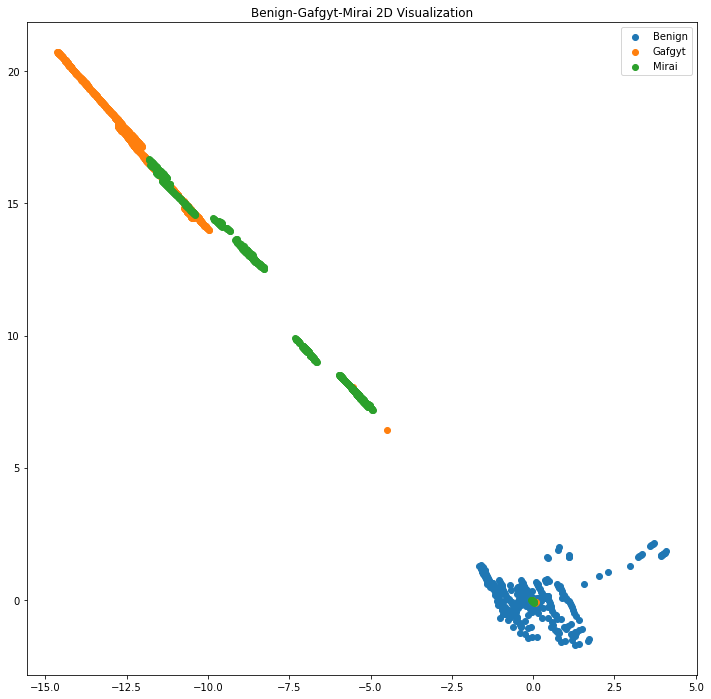

In [50]:
visualization_2d(data_benign_transformed[:1000], data_gafgyt_transformed[:1000],data_mirai_transformed[:1000], indexes=[1,2])

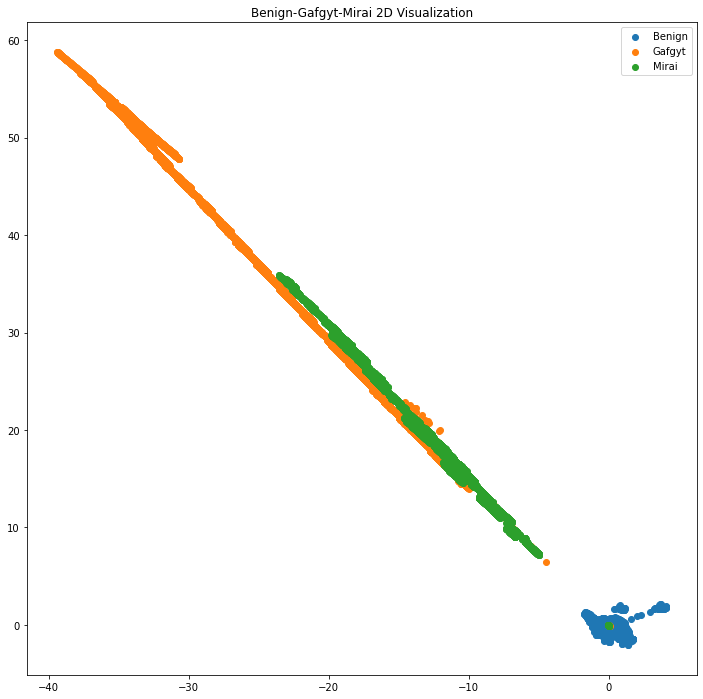

In [51]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2])

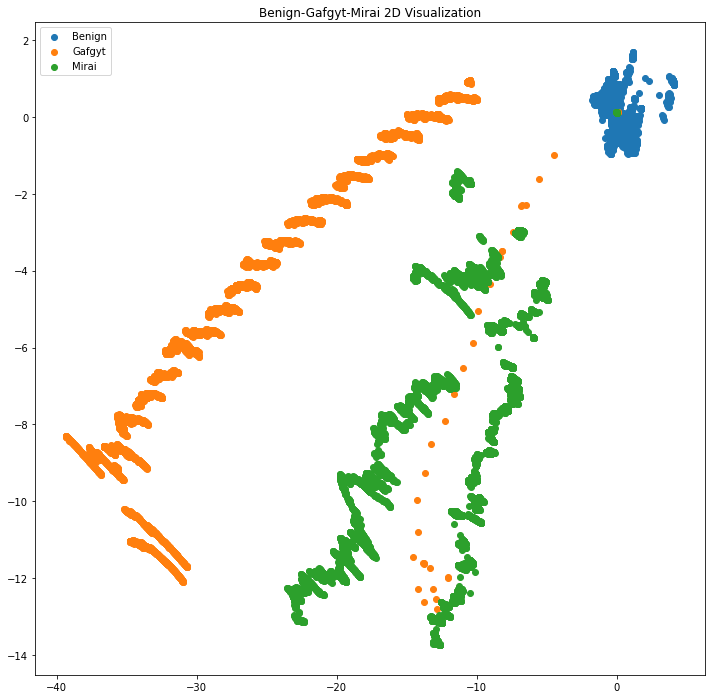

In [52]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,3])

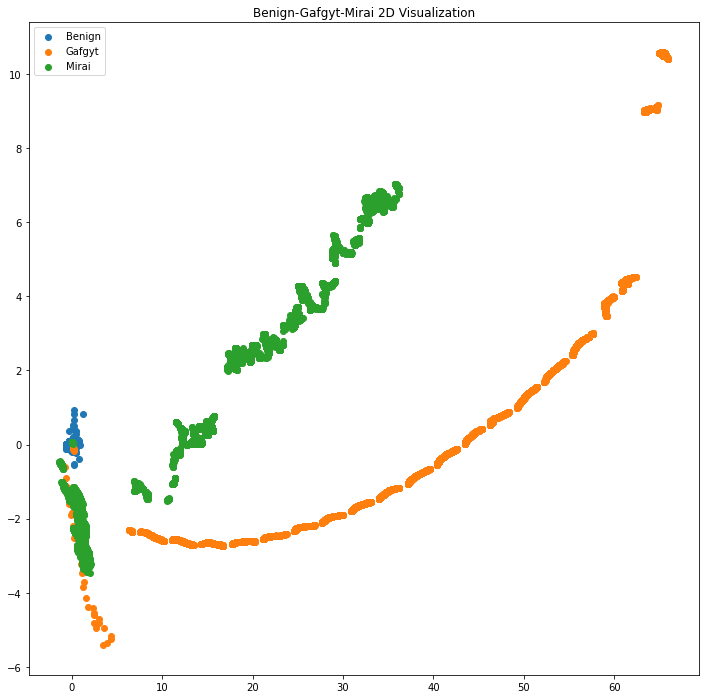

In [53]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[10,25])

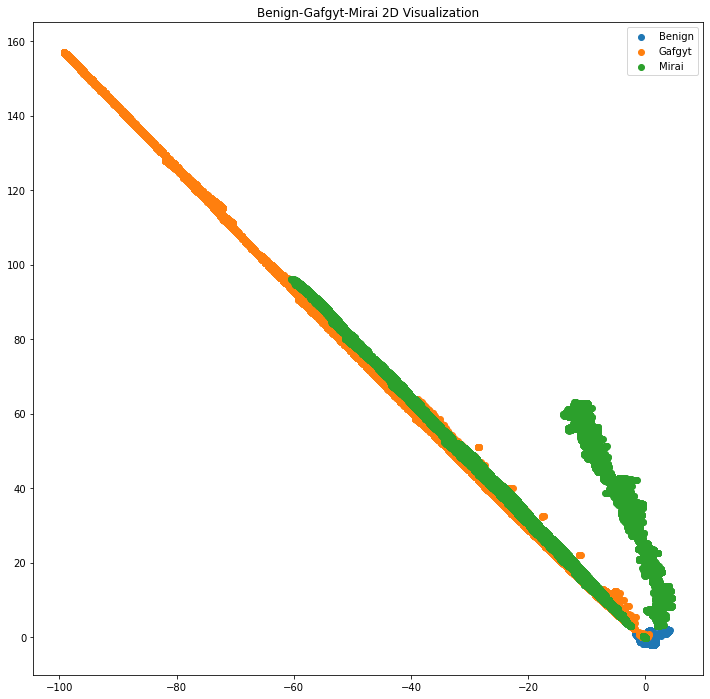

In [54]:
visualization_2d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2])

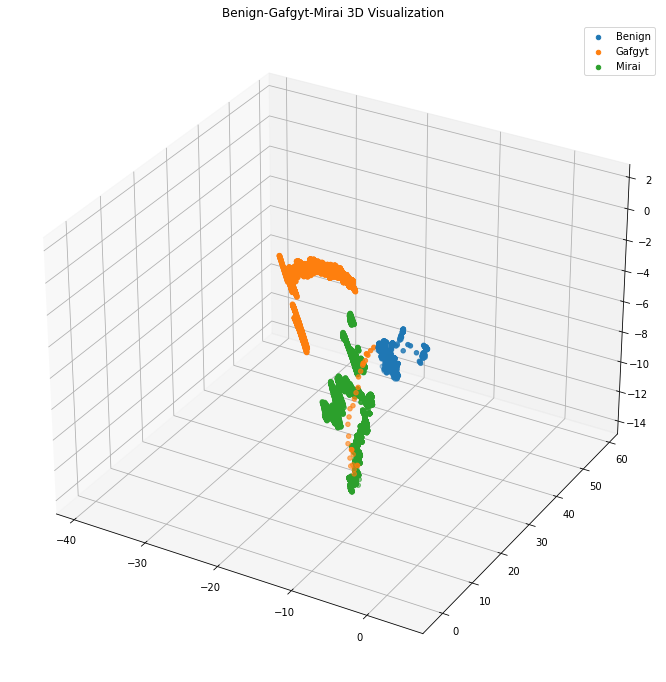

In [55]:
visualization_3d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2,3])

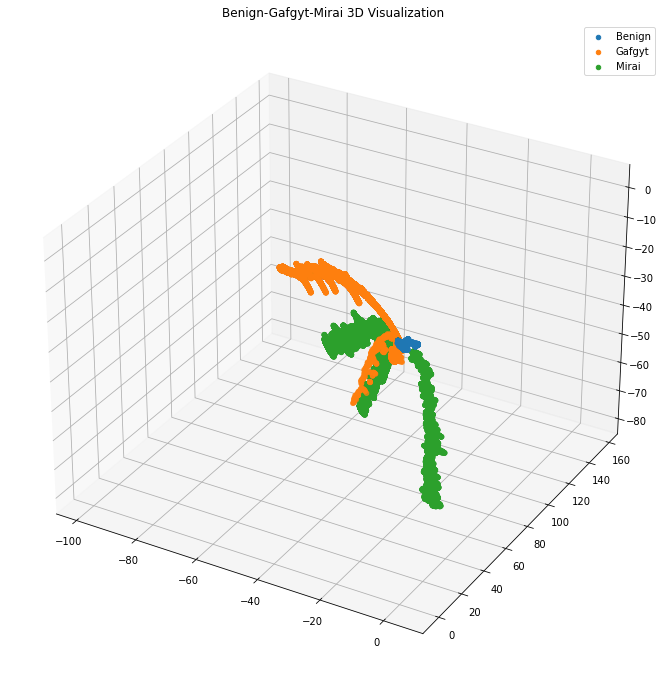

In [56]:
visualization_3d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2,3])